# Regresión Polinomial

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("data/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
data.shape

(30, 2)

0.9782416184887599


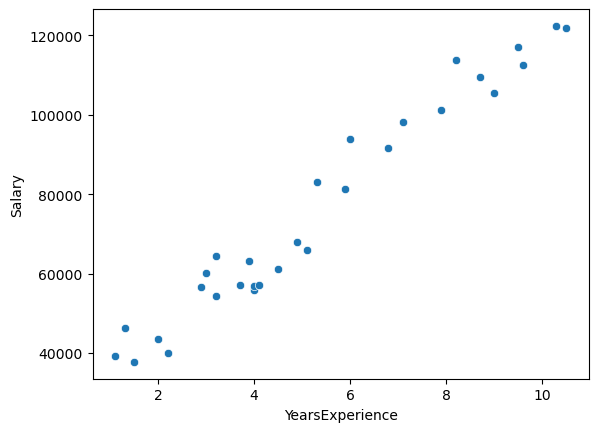

In [20]:
sns.scatterplot(x="YearsExperience", y="Salary", data=data)
print(data["YearsExperience"].corr(data["Salary"]))


In [195]:
x = np.array(data["YearsExperience"], dtype=float)
y = np.array(data["Salary"],dtype=float)
cantidad_datos = data.shape[0]

In [226]:
def funcion_regresion(coeficientes,x):
    return np.polyval(coeficientes,x)

In [232]:
grado_polinomio = 13

matriz_a = np.zeros((grado_polinomio+1,grado_polinomio+1), dtype=float)
matriz_b = np.zeros(grado_polinomio+1, dtype=float)
valores_x = np.zeros(grado_polinomio**2 + 1, dtype=float)
valores_x[0] = cantidad_datos


for i in range(1,grado_polinomio**2 + 1):
    valores_x[i] = (x**i).sum()

for i in range(0,grado_polinomio + 1):
    matriz_a[i] = valores_x[i:grado_polinomio+i+1]
    matriz_b[i] = ((x**i) * y).sum()
    
coeficientes = np.linalg.solve(matriz_a,matriz_b)
print(coeficientes)
coeficientes = np.flip(coeficientes)
coeficientes

[-1.37561546e+06  4.12431403e+06 -4.83154002e+06  2.94166172e+06
 -9.87378946e+05  1.64623386e+05 -1.48360770e+03 -4.80404023e+03
  9.08632057e+02 -6.73387479e+01 -9.72382037e-02  3.61797282e-01
 -2.31877703e-02  4.89317372e-04]


array([ 4.89317372e-04, -2.31877703e-02,  3.61797282e-01, -9.72382037e-02,
       -6.73387479e+01,  9.08632057e+02, -4.80404023e+03, -1.48360770e+03,
        1.64623386e+05, -9.87378946e+05,  2.94166172e+06, -4.83154002e+06,
        4.12431403e+06, -1.37561546e+06])

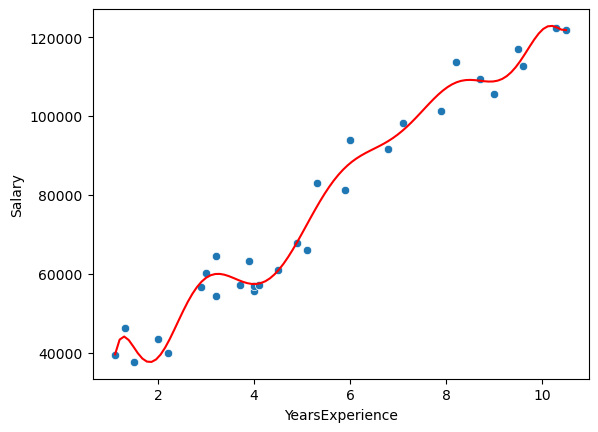

In [233]:
regresion_x = np.linspace(min(x),max(x),100)
regresion_y = funcion_regresion(coeficientes,regresion_x)
sns.scatterplot(x="YearsExperience", y="Salary", data=data)
plt.plot(regresion_x,regresion_y, color = "r")